<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18925 entries, 0 to 18924
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18925 non-null  int64  
 1   name                            18925 non-null  object 
 2   host_id                         18925 non-null  int64  
 3   host_name                       18923 non-null  object 
 4   neighbourhood_group             18925 non-null  object 
 5   neighbourhood                   18925 non-null  object 
 6   latitude                        18925 non-null  float64
 7   longitude                       18925 non-null  float64
 8   room_type                       18925 non-null  object 
 9   price                           15189 non-null  float64
 10  minimum_nights                  18925 non-null  int64  
 11  number_of_reviews               18925 non-null  int64  
 12  last_review                     

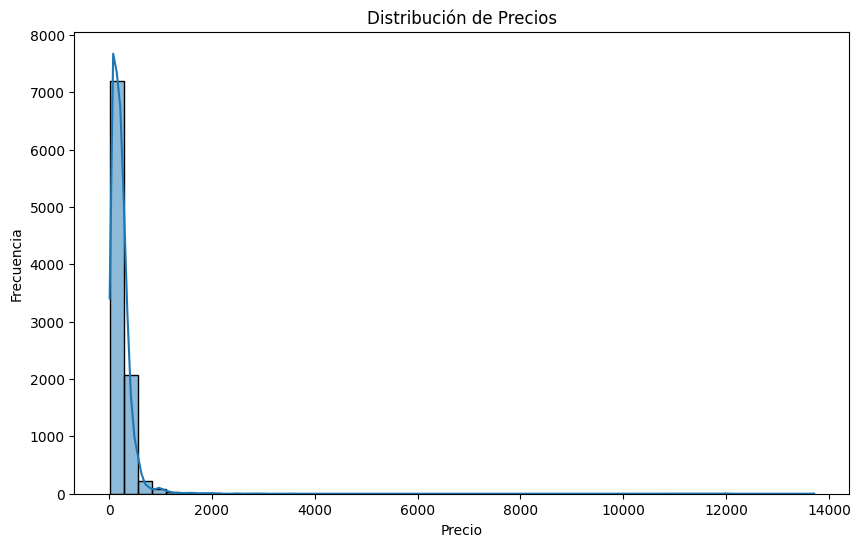

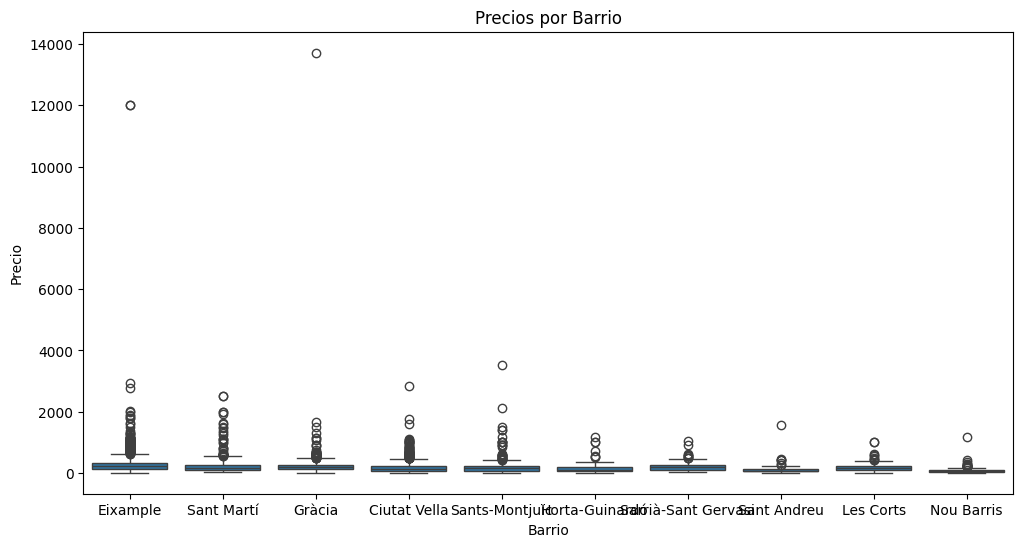

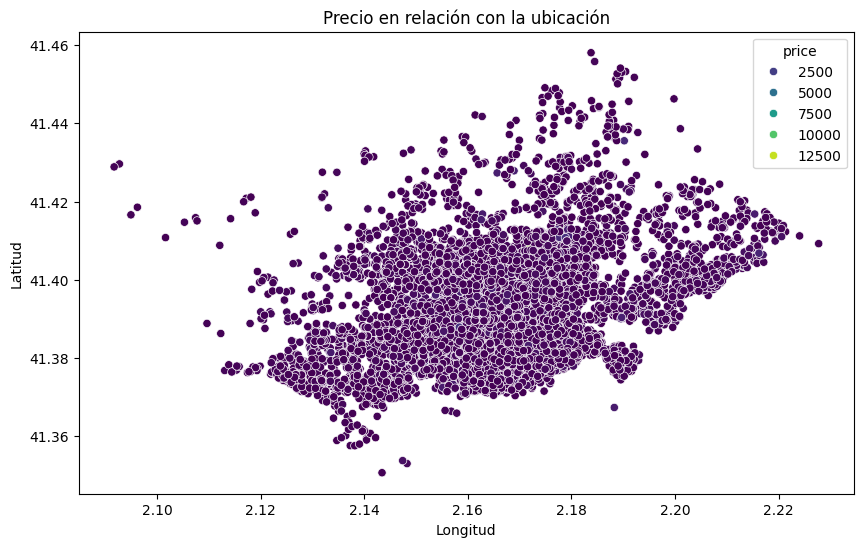

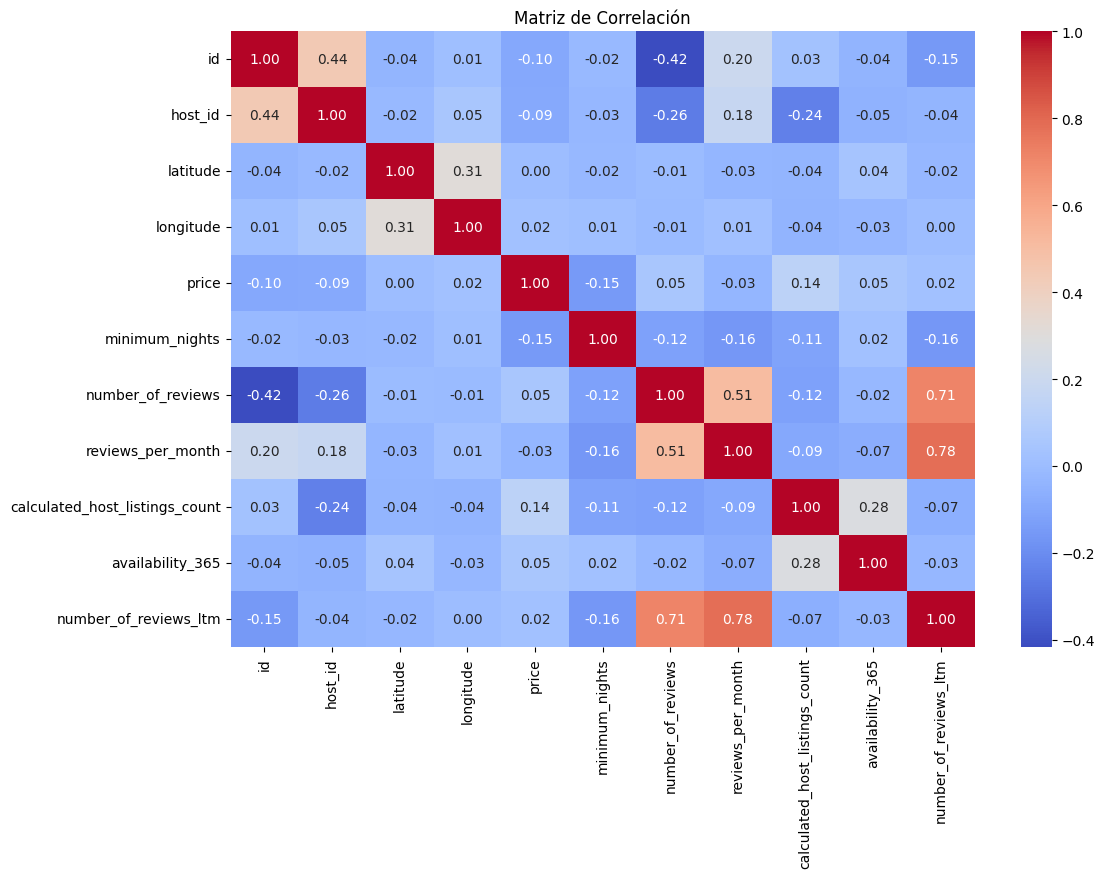

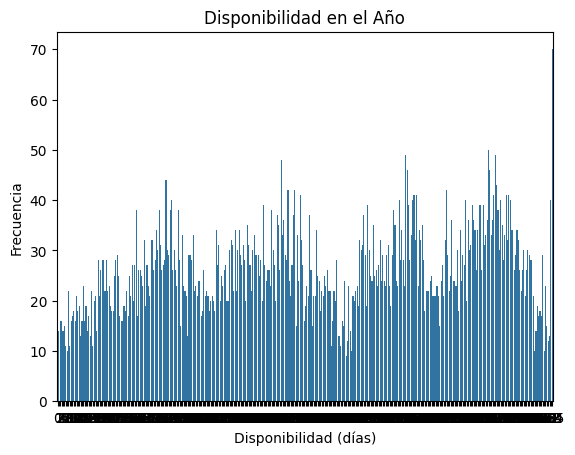

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_BarcelonaJune24 =pd.read_csv(r'C:\Users\alber\Downloads\listingsB15June24.csv')

# 1. Vista general del dataset
print(df_BarcelonaJune24.info())
print(df_BarcelonaJune24.describe())
print(df_BarcelonaJune24.head())

# Eliminar los nulos de las columnas
df_BarcelonaJune24 = df_BarcelonaJune24.dropna()


# 2. Verificar valores nulos
print(df_BarcelonaJune24.isnull().sum())

# 3. Limpiar y convertir la columna 'price' a numérica (puede tener símbolos no numéricos)
# Eliminar símbolos como "$" y comas en la columna 'price'
df_BarcelonaJune24['price'] = df_BarcelonaJune24['price'].replace({'\\$': '', ',': ''}, regex=True)

# Convertir la columna 'price' a tipo numérico, con 'coerce' para manejar los errores y convertir a NaN cuando no se pueda
df_BarcelonaJune24['price'] = pd.to_numeric(df_BarcelonaJune24['price'], errors='coerce')

# Verifica que la conversión sea exitosa
print(df_BarcelonaJune24['price'].describe())

# 4. Filtrar solo las columnas numéricas para análisis
df_numerico = df_BarcelonaJune24.select_dtypes(include=[np.number])

# Verificar que las columnas numéricas son las correctas
print(df_numerico.columns)

# 5. Estadísticas generales para la columna 'price'
print(df_numerico['price'].describe())  # Estadísticas para precios, por ejemplo

# 6. Distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df_numerico['price'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# 7. Análisis de precios por barrio
# Verificar si 'neighbourhood_group' es una columna numérica o categórica
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_BarcelonaJune24)
plt.title('Precios por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio')
plt.show()

# 8. Relación entre características y el precio
# Asegúrate de que 'longitude' y 'latitude' son numéricas antes de hacer el gráfico
df_BarcelonaJune24['longitude'] = pd.to_numeric(df_BarcelonaJune24['longitude'], errors='coerce')
df_BarcelonaJune24['latitude'] = pd.to_numeric(df_BarcelonaJune24['latitude'], errors='coerce')

# Solo usar columnas numéricas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df_BarcelonaJune24, palette='viridis')
plt.title('Precio en relación con la ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

# 9. Correlación entre variables numéricas
correlation_matrix = df_numerico.corr()  # Utilizar solo columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# 10. Análisis de la disponibilidad
sns.countplot(x='availability_365', data=df_BarcelonaJune24)
plt.title('Disponibilidad en el Año')
plt.xlabel('Disponibilidad (días)')
plt.ylabel('Frecuencia')
plt.show()


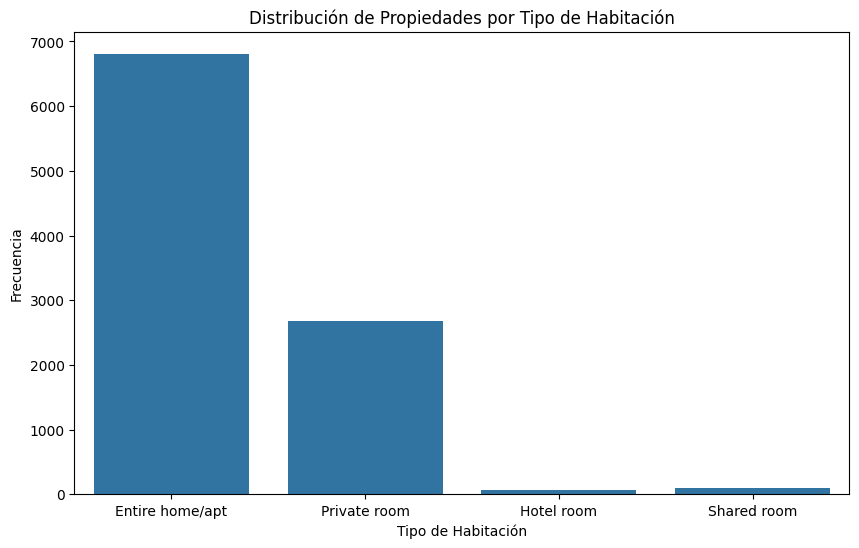

In [2]:
# Distribución de las propiedades por tipo de habitación
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df_BarcelonaJune24)
plt.title('Distribución de Propiedades por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Frecuencia')
plt.show()


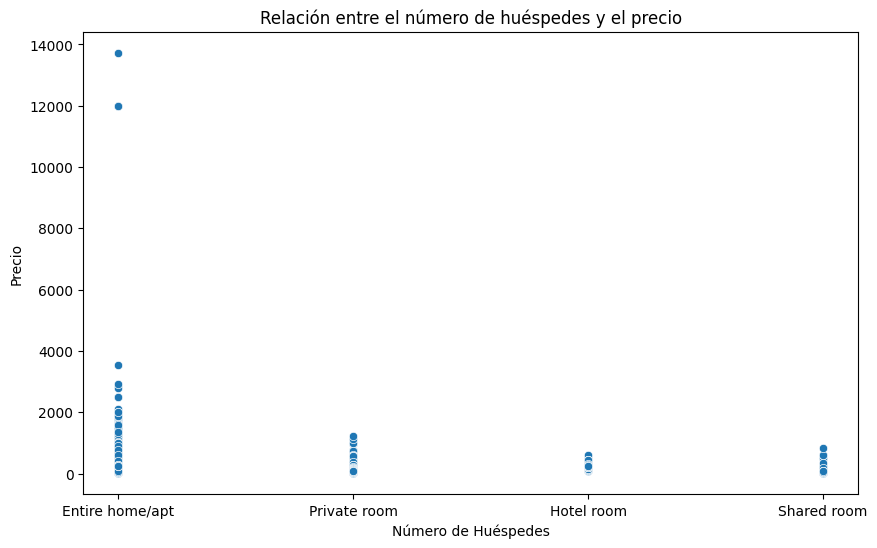

In [3]:
# Relación entre el número de huéspedes y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_type', y='price', data=df_BarcelonaJune24)
plt.title('Relación entre el número de huéspedes y el precio')
plt.xlabel('Número de Huéspedes')
plt.ylabel('Precio')
plt.show()


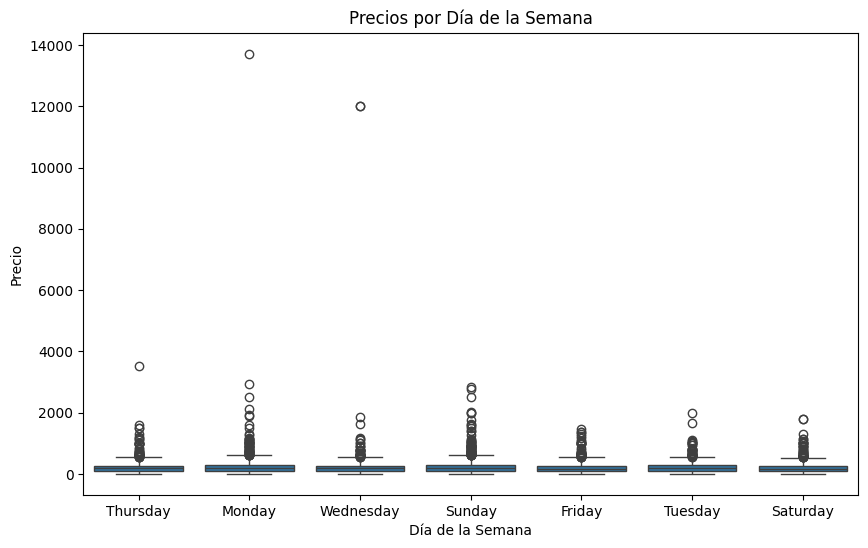

In [4]:
# Si tienes una columna de fecha, como 'last_review', puedes extraer el día de la semana y analizarlo
df_BarcelonaJune24['last_review'] = pd.to_datetime(df_BarcelonaJune24['last_review'], errors='coerce')
df_BarcelonaJune24['day_of_week'] = df_BarcelonaJune24['last_review'].dt.day_name()

# Análisis de precios por día de la semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='price', data=df_BarcelonaJune24)
plt.title('Precios por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Precio')
plt.show()


In [5]:
# Propiedades con mayor y menor disponibilidad
top_available = df_BarcelonaJune24.nlargest(10, 'availability_365')
low_available = df_BarcelonaJune24.nsmallest(10, 'availability_365')

print("Top 10 propiedades con mayor disponibilidad")
print(top_available[['name', 'availability_365']])

print("Top 10 propiedades con menor disponibilidad")
print(low_available[['name', 'availability_365']])


Top 10 propiedades con mayor disponibilidad
                                                   name  availability_365
17                             130. Hércules Pequeño 41               365
112    nap2 Happy & Quiet 3 bedroom & 2 bathrooms flat!               365
178   sfp2 2 Bedroom Acomodis Apartment Sagrada Familia               365
864                 Nice Apt. 2min from Sagrada Familia               365
1391                 Apartment 5 minutes from the beach               365
1889                 Habitación privada Sagrada Familia               365
1959     mr2  Gothic quarter! Happy guests! Best price!               365
2051                    Library Room 2 Catalunya Rambla               365
2052  pb4 WITH TERRACE QUIET & HAPPY FLAT "ACOMODIS"...               365
2131  pb1 Nice Barcelona, quiet flat with happy terrace               365
Top 10 propiedades con menor disponibilidad
                                                  name  availability_365
66     *monthly stays* 4 

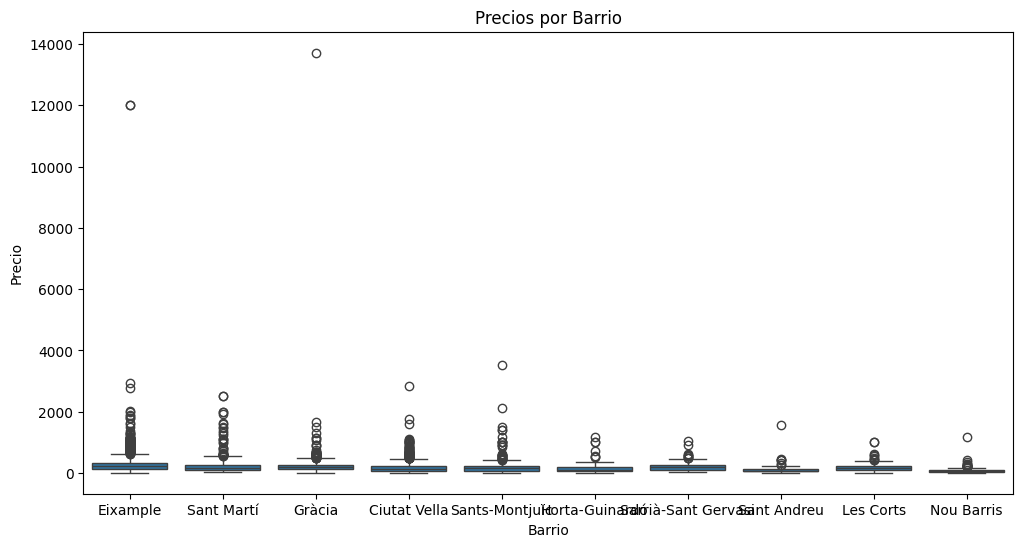

In [6]:
# Boxplot de precios por barrio
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_BarcelonaJune24)
plt.title('Precios por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio')
plt.show()


In [7]:
# Identificar las propiedades con los precios más altos
top_expensive = df_BarcelonaJune24.nlargest(10, 'price')
print(top_expensive[['name', 'price', 'neighbourhood_group', 'room_type']])


                                                    name    price  \
493    Lovely brand new flat in Sagrada Familia with ...  13714.0   
12897        Penthouse 3BR sea views near SagradaFamilia  11999.0   
12899        Spacious Flat 3BR Terrace and Sagrada Views  11999.0   
8626                     Plaza España, comfy, 3 bedrooms   3528.0   
17637                    AB Sagrada Familia Views  VII-I   2935.0   
4472   7 Bedroom apartment in city centre- Classic Style   2857.0   
16147  roc Great 12 bedrooms 6 bathr Groupflat L'Eixa...   2786.0   
1733                        3 apartments in Diagonal Mar   2500.0   
1734                        4 apartments in Olympic zone   2500.0   
6280    ch2x4a Large GroupFlat Ramblas - Fira Barcelona!   2109.0   

      neighbourhood_group        room_type  
493                Gràcia  Entire home/apt  
12897            Eixample  Entire home/apt  
12899            Eixample  Entire home/apt  
8626       Sants-Montjuïc  Entire home/apt  
17637          

In [8]:
# Propiedades con las mejores calificaciones
top_rated = df_BarcelonaJune24.nlargest(10, 'number_of_reviews')  # Asumiendo que hay una columna 'review_scores_rating'
print(top_rated[['name', 'number_of_reviews', 'price']])


                                                   name  number_of_reviews  \
9791       Bed in a mixed room for 8 pax - Unite Hostel               2121   
6342             Hola Hostal Eixample. Bed in a 24 dorm               2078   
5666   Spacious & Trendy Apartment near Sagrada Familia               1247   
437   Acogedor Apto Confortable ,Bien Ubicado y Parking               1218   
4750                 Double Exterior Rooms with balcony               1212   
9307   Catalonia Sagrada Familia 3* Hotel - Double Room               1179   
4735       Timeless style in a Double/Twin with balcony               1153   
8649       Exterior double room in Hotel Praktik Bakery               1129   
6112                            CITY CENTER BARCELONA 1                963   
5116      Two Bedroom Apartment next to Sagrada Familia                931   

      price  
9791   64.0  
6342   25.0  
5666  349.0  
437   201.0  
4750  249.0  
9307  200.0  
4735  228.0  
8649  266.0  
6112  213.0  
5

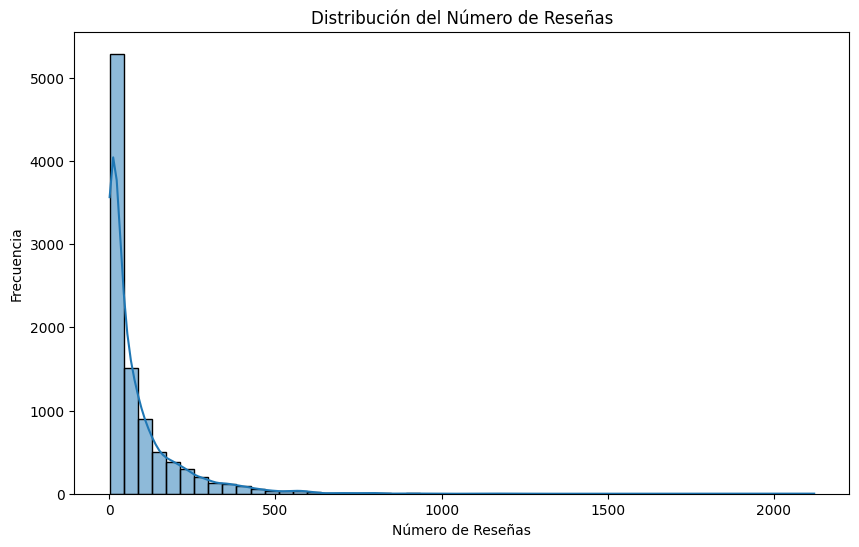

In [9]:
# Distribución de reseñas
plt.figure(figsize=(10, 6))
sns.histplot(df_BarcelonaJune24['number_of_reviews'], kde=True, bins=50)
plt.title('Distribución del Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.show()


In [10]:
# Propiedades más caras con el mayor número de reseñas
top_expensive_reviews = df_BarcelonaJune24.nlargest(10, ['price', 'number_of_reviews'])
print(top_expensive_reviews[['name', 'price', 'number_of_reviews']])


                                                    name    price  \
493    Lovely brand new flat in Sagrada Familia with ...  13714.0   
12899        Spacious Flat 3BR Terrace and Sagrada Views  11999.0   
12897        Penthouse 3BR sea views near SagradaFamilia  11999.0   
8626                     Plaza España, comfy, 3 bedrooms   3528.0   
17637                    AB Sagrada Familia Views  VII-I   2935.0   
4472   7 Bedroom apartment in city centre- Classic Style   2857.0   
16147  roc Great 12 bedrooms 6 bathr Groupflat L'Eixa...   2786.0   
1733                        3 apartments in Diagonal Mar   2500.0   
1734                        4 apartments in Olympic zone   2500.0   
6280    ch2x4a Large GroupFlat Ramblas - Fira Barcelona!   2109.0   

       number_of_reviews  
493                  351  
12899                 19  
12897                 16  
8626                   1  
17637                  3  
4472                 131  
16147                  1  
1733                   2

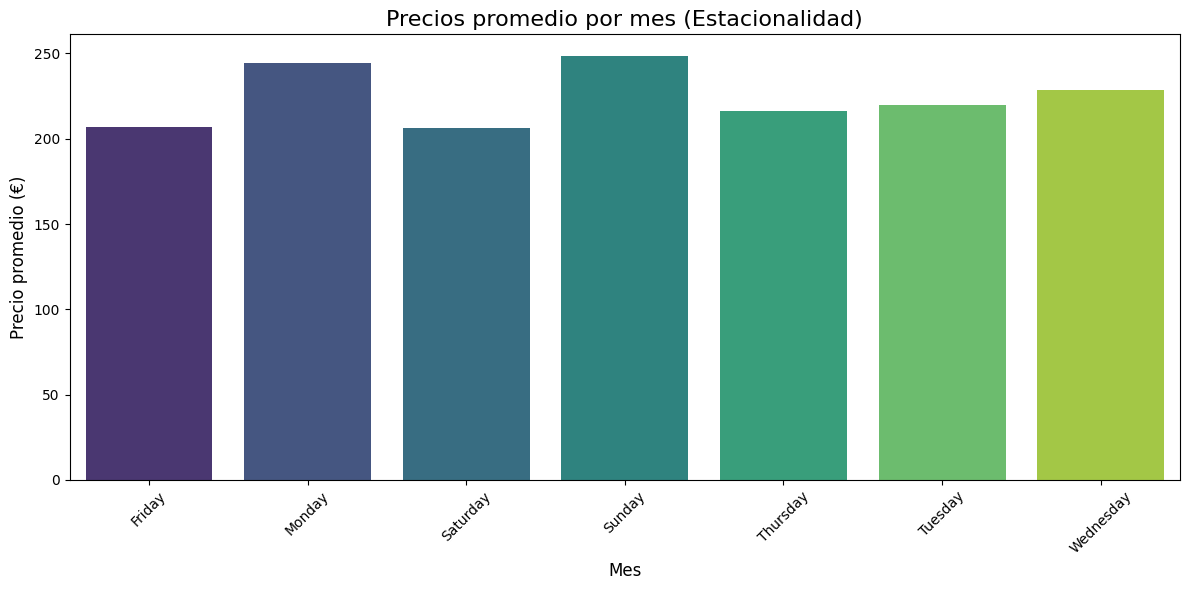

In [11]:
# Calcular precios promedio por mes
monthly_prices = df_BarcelonaJune24.groupby('day_of_week')['price'].mean()

# Visualización de precios promedio por mes
plt.figure(figsize=(12, 6))

# Usar un 'hue' para asociar el color, aunque no es necesario en este caso
sns.barplot(x=monthly_prices.index, y=monthly_prices.values, hue=monthly_prices.index, palette="viridis", legend=False)

# Títulos y etiquetas
plt.title("Precios promedio por mes (Estacionalidad)", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Precio promedio (€)", fontsize=12)
plt.xticks(rotation=45)

# Ajuste del diseño
plt.tight_layout()
plt.show()
